# House Prices - Advanced Regression Techniques

In [92]:
#packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import statsmodels.api as sm

In [93]:
#LR
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [94]:
#Random Forest
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn import tree

In [95]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [96]:
#Datei einlesen
df = pd.read_csv("train.csv")

### Alle Variablen

In [97]:
#erster Überblick
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [98]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [99]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [100]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Text(171.72222222222234, 0.5, 'Features')

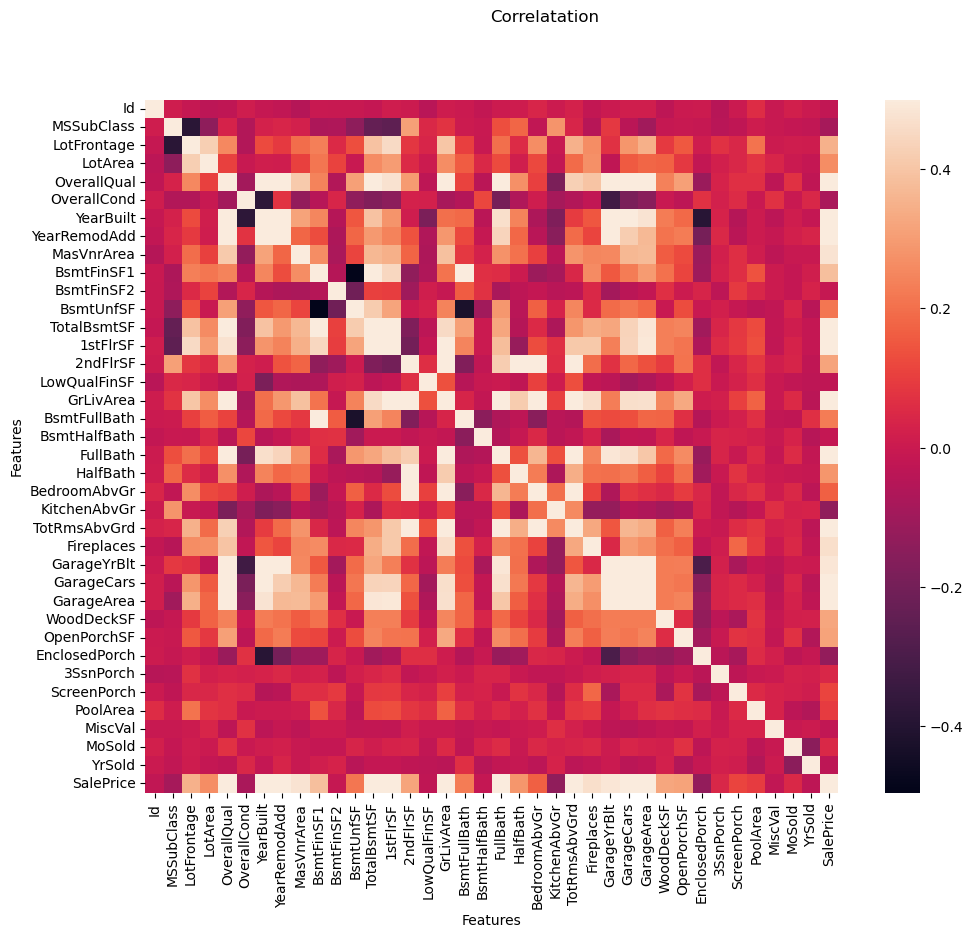

In [101]:
#correlation matrix
corr_mat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corr_mat, vmax=.5,square=True)

plt.suptitle("Correlatation")
plt.xlabel("Features")
plt.ylabel("Features")

### Untergruppen

In [102]:
# Gebäude
gebaeude = ['MSSubClass', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 
            'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'MasVnrType', 'MasVnrArea', 'Foundation', 
            'OverallQual', 'OverallCond', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'LowQualFinSF', 'Functional']

# Grundstück
grundstueck = ['LotFrontage', 'LotArea', 'LotShape', 'LotConfig', 'LandContour', 'LandSlope']

# Versorgung
versorgung = ['Street', 'Alley', 'PavedDrive', 'Utilities']

# Standort
standort = ['MSZoning', 'Neighborhood', 'Condition1', 'Condition2']

# Garage
garage = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']

# Energie
energie = ['Heating', 'HeatingQC', 'CentralAir', 'Electrical']

# Keller
keller = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 
          'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']

# Außenbereich
aussenbereich = ['Fireplaces', 'FireplaceQu', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 
                 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']

# Räume
raeume = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'KitchenQual', 
          'TotRmsAbvGrd', 'BedroomAbvGr']

# Verkauf
verkauf = ['MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']


### Daten aufbereiten

In [103]:
### Daten Aufbereiten

# Mappings für ordinale Features
ORDINAL_FEATURE_MAPPINGS = {
  "OverallQual": ["VPo", "Po", "Fa", "BAvg", "Avg", "AAvg", "Gd", "VGd", "Ex", "VEx"],
  "OverallCond": ["VPo", "Po", "Fa", "BAvg", "Avg", "AAvg", "Gd", "VGd", "Ex", "VEx"],
  "OverallGrade": ["VPo", "Po", "Fa", "BAvg", "Avg", "AAvg", "Gd", "VGd", "Ex", "VEx"],
  "ExterQual": ["Po", "Fa", "TA", "Gd", "Ex"],
  "ExterCond": ["Po", "Fa", "TA", "Gd", "Ex"],
  "BsmtQual": ["XX", "Po", "Fa", "TA", "Gd", "Ex"],
  "BsmtCond": ["XX", "Po", "Fa", "TA", "Gd", "Ex"],
  "BsmtFinType1": ["XX", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
  "BsmtFinType2": ["XX", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
  "BsmtExposure": ["XX", "No", "Mn", "Av", "Gd"],
  "HeatingQC": ["Po", "Fa", "TA", "Gd", "Ex"],
  "KitchenQual": ["Po", "Fa", "TA", "Gd", "Ex"],
  "FireplaceQu": ["XX", "Po", "Fa", "TA", "Gd", "Ex"],
  "GarageQual": ["XX", "Po", "Fa", "TA", "Gd", "Ex"],
  "GarageCond": ["XX", "Po", "Fa", "TA", "Gd", "Ex"],
  "PoolQC": ["XX", "Fa", "TA", "Gd", "Ex"],
  "LandSlope": ["Sev", "Mod", "Gtl"],
  "LotShape": ["IR3", "IR2", "IR1", "Reg"],
  "PavedDrive": ["N", "P", "Y"],
  "Utilities": ["ELO", "NoSeWa", "NoSewr", "AllPub"],
  "MoSold": ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
              "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
}

def preprocess(df: pd.DataFrame):
  """
  Preprocess data for modeling.
  """

  # Feature engineering transformations

  df["Age"] = df["YrSold"] - df["YearBuilt"]
  df["RemodAge"] = df["YrSold"] - df["YearRemodAdd"]
  df["TotalSF"] = df["TotalBsmtSF"] + df["GrLivArea"]
  df["TotalBathAbvGr"] = df["FullBath"] + df["HalfBath"] * 0.5
  df["TotalBathBsmt"] = df["BsmtFullBath"] + df["BsmtHalfBath"] * 0.5
  df["AvgRoomSF"] = round(df["GrLivArea"] / (df["TotRmsAbvGrd"] + df["TotalBathAbvGr"]), 2)

  df["OverallGrade"] = np.ceil((df["OverallQual"] + df["OverallCond"]) / 2).astype(int)
  df["OverallGrade"] = df["OverallGrade"].replace({
    10: "VEx",
    9: "Ex",
    8: "VGd",
    7: "Gd",
    6: "AAvg",
    5: "Avg",
    4: "BAvg",
    3: "Fa",
    2: "Po",
    1: "VPo"})

  # Building properties transformations

  df["MSSubClass"] = df["MSSubClass"].replace({
    20: "1S1946-NEW", # 1-STORY 1946 & NEWER ALL STYLES
    30: "1S1945-OLD", # 1-STORY 1945 & OLDER
    40: "1SFIN-ALL", # 1-STORY W/FINISHED ATTIC ALL AGES
    45: "1-1/2UNF-ALL", # 1-1/2 STORY - UNFINISHED ALL AGES
    50: "1-1/2FIN-ALL", # 1-1/2 STORY FINISHED ALL AGES
    60: "2S1946-NEW", # 2-STORY 1946 & NEWER
    70: "2S1945-OLD", # 2-STORY 1945 & OLDER
    75: "2-1/2S-ALL", # 2-1/2 STORY ALL AGES
    80: "SPLT-ALL", # SPLIT OR MULTI-LEVEL
    85: "SPLT-FOYER", # SPLIT FOYER
    90: "DUPLEX-ALL", # DUPLEX - ALL STYLES AND AGES
    120: "1SPUD1946-NEW", # 1-STORY PUD (Planned Unit Development) - 1946 & NEWER
    150: "1-1/2SPUD-ALL", # 1-1/2 STORY PUD - ALL AGES
    160: "2SPUD1946-NEW", # 2-STORY PUD - 1946 & NEWER
    180: "PUD-ALL", # PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
    190: "2FAM-ALL"}) # 2 FAMILY CONVERSION - ALL STYLES AND AGES

  df["MasVnrType"] = df["MasVnrType"].fillna("XX")

  df["OverallCond"] = df["OverallCond"].replace({
    10: "VEx",
    9: "Ex",
    8: "VGd",
    7: "Gd",
    6: "AAvg",
    5: "Avg",
    4: "BAvg",
    3: "Fa",
    2: "Po",
    1: "VPo"})

  df["OverallQual"] = df["OverallQual"].replace({
    10: "VEx",
    9: "Ex",
    8: "VGd",
    7: "Gd",
    6: "AAvg",
    5: "Avg",
    4: "BAvg",
    3: "Fa",
    2: "Po",
    1: "VPo"})

  # Lot properties transformations

  df["LotFrontage"] = df["LotFrontage"].fillna(0)

  # Utility properties transformations

  df["Alley"] = df["Alley"].fillna("XX")

  # Neighborhood properties transformations

  # Garage properties transformations

  df.loc[df["GarageQual"].isna(), "GarageFinish"] = "XX"
  df.loc[df["GarageQual"].isna(), "GarageType"] = "XX"
  df.loc[df["GarageQual"].isna(), "GarageCond"] = "XX"
  df.loc[df["GarageQual"].isna(), "GarageArea"] = 0
  df.loc[df["GarageQual"].isna(), "GarageCars"] = 0
  df.loc[df["GarageQual"].isna(), "GarageYrBlt"] = 0
  df["GarageQual"] = df["GarageQual"].fillna("XX")

  # Supplies properties transformations

  # Basement properties transformations

  df.loc[df["BsmtQual"].isna(), "BsmtCond"] = "XX"
  df.loc[df["BsmtQual"].isna(), "BsmtExposure"] = "XX"
  df.loc[df["BsmtQual"].isna(), "BsmtFinType1"] = "XX"
  df.loc[df["BsmtQual"].isna(), "BsmtFinType2"] = "XX"
  df.loc[df["BsmtQual"].isna(), "BsmtFinSF1"] = 0
  df.loc[df["BsmtQual"].isna(), "BsmtFinSF2"] = 0
  df.loc[df["BsmtQual"].isna(), "BsmtUnfSF"] = 0
  df.loc[df["BsmtQual"].isna(), "TotalBsmtSF"] = 0
  df.loc[df["BsmtQual"].isna(), "BsmtFullBath"] = 0
  df.loc[df["BsmtQual"].isna(), "BsmtHalfBath"] = 0
  df["BsmtQual"] = df["BsmtQual"].fillna("XX")

  # Outdoor area properties transformations

  df["FireplaceQu"] = df["FireplaceQu"].fillna("XX")
  df["PoolQC"] = df["PoolQC"].fillna("XX")
  df["Fence"] = df["Fence"].fillna("XX")
  df["MiscFeature"] = df["MiscFeature"].fillna("XX")

  # Kitchen properties transformations

  # Sale properties transformations

  df["MoSold"] = df["MoSold"].replace({
    1: "Jan",
    2: "Feb",
    3: "Mar",
    4: "Apr",
    5: "May",
    6: "Jun",
    7: "Jul",
    8: "Aug",
    9: "Sep",
    10: "Oct",
    11: "Nov",
    12: "Dec"})

  # General clean up transformations

  df = df.dropna()
  df = df.drop(columns=["Id"])

  return df


In [104]:
df = preprocess(df)

In [105]:
df.isnull().sum()

MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
                 ..
TotalSF           0
TotalBathAbvGr    0
TotalBathBsmt     0
AvgRoomSF         0
OverallGrade      0
Length: 87, dtype: int64

In [106]:
#one hot
df2 = pd.get_dummies(df)
print(df2.shape)

(1449, 361)


In [107]:
df2.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'OverallGrade_AAvg', 'OverallGrade_Avg', 'OverallGrade_BAvg',
       'OverallGrade_Ex', 'OverallGrade_Fa', 'OverallGrade_Gd',
       'OverallGrade_Po', 'OverallGrade_VEx', 'OverallGrade_VGd',
       'OverallGrade_VPo'],
      dtype='object', length=361)

In [108]:
zielvar = df2['SalePrice']

# Alle anderen Spalten skalieren
scaler = StandardScaler()
df3 = scaler.fit_transform(df2.drop('SalePrice', axis=1))

df3 = pd.DataFrame(df3, columns=df2.columns.difference(['SalePrice']).tolist())

df3 = pd.concat([zielvar, df3], axis=1)
df3.columns

Index(['SalePrice', '1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Age', 'Alley_Grvl',
       'Alley_Pave', 'Alley_XX', 'AvgRoomSF', 'BedroomAbvGr',
       ...
       'TotalBathAbvGr', 'TotalBathBsmt', 'TotalBsmtSF', 'TotalSF',
       'Utilities_AllPub', 'Utilities_NoSeWa', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold'],
      dtype='object', length=361)

In [109]:
df3.shape

(1460, 361)

In [110]:
df3.fillna(0, inplace=True)

### Daten splitten

In [111]:
train_set, test_set = train_test_split(df3,train_size= 0.7, random_state=42)

#X_train = train_set[:, 1:]  
#y_train = train_set[:, 0]  

#X_test = test_set[:, 1:] 
#y_test = test_set[:, 0] 

X_train = train_set.drop(["SalePrice"], axis=1)  
y_train = train_set["SalePrice"].copy()             

X_test = test_set.drop(["SalePrice"], axis=1)  
y_test = test_set["SalePrice"].copy()      

In [112]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(1021, 360)
(439, 360)
(1021,)
(439,)


### LR

#### Muliple Lineare Regression

In [113]:
# reg fit on training
model_reg = linear_model.LinearRegression()
model_reg.fit(X_train, y_train)

# Extrahieren der Koeffizienten (Steigungen)
coefficients = model_reg.coef_

# Extrahieren des y-Achsenabschnitts (Intercept)
intercept = model_reg.intercept_

# Ausgabe der Koeffizienten und des y-Achsenabschnitts
print("Intercept:", intercept)
#print("Coefficients:", coefficients)

Intercept: 172401.61214495593


In [114]:
model_reg.score(X_train, y_train)

0.27891519651027075

In [115]:
#predict value of sale price on the training set
y1_pred = model_reg.predict(X_train)

print(y1_pred)

[107073.11214496 190065.11214496 150033.11214496 ... 177009.11214496
 181297.11214496 222913.11214496]


In [116]:
rmse_lrtrain = metrics.mean_squared_error(y1_pred,y_train, squared=False)
rmsle_lrtrain = metrics.mean_squared_log_error(y1_pred,y_train, squared=False)

print('Fehler LR Train')
print(rmse_lrtrain)
print(rmsle_lrtrain)

Fehler LR Train
66788.48372229947
1.0933353411900093


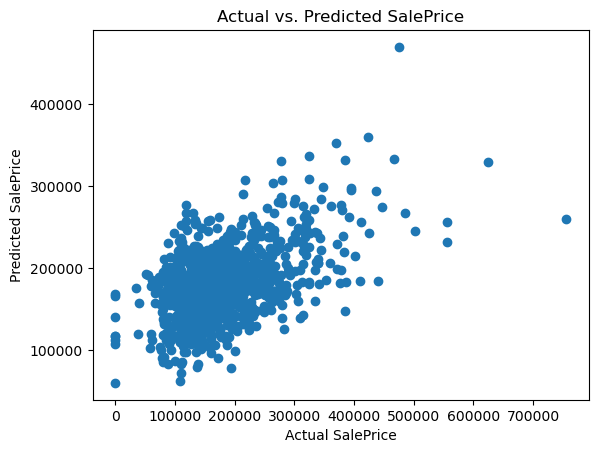

In [117]:
results = pd.DataFrame({"Actual": y_train, "Predicted": y1_pred})

# Plotte ein Streudiagramm der tatsächlichen Werte gegen die vorhergesagten Werte
plt.scatter(results["Actual"], results["Predicted"])
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs. Predicted SalePrice")
plt.show()

In [118]:
#Test Model:
model_reg2 = linear_model.LinearRegression()
model_reg2.fit(X_test, y_test)

model_reg2.score(X_test, y_test)

0.5802508333716182

In [121]:
y2_pred = model_reg2.predict(X_test)
#print(y2_pred)

In [126]:
rmse_lrtest = metrics.mean_squared_error(y2_pred,y_test, squared=False)
rmsle_lrtest = metrics.mean_squared_log_error(y2_pred,y_test, squared=False)

print('Fehler LR Test')
print(rmse_lrtest)
print(rmsle_lrtest)

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

### Random Forrest

### Classifier

In [127]:
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train, y_train)

rfc_pred1 = rfc.predict(X_train)
rfc_pred2 = rfc.predict(X_test)

In [128]:
rmse_rfctrain = metrics.mean_squared_error(rfc_pred1,y_train, squared=False)
rmsle_rfctrain = metrics.mean_squared_log_error(rfc_pred1,y_train, squared=False)

print('Fehler RF Train')
print(rmse_rfctrain)
print(rmsle_rfctrain)

Fehler RF Train
11019.247549283917
0.05604506599584328


In [129]:
rmse_rfctest = metrics.mean_squared_error(rfc_pred2,y_test, squared=False)
rmsle_rfctest = metrics.mean_squared_log_error(rfc_pred2,y_test, squared=False)

print('Fehler RF Test')
print(rmse_rfctest)
print(rmsle_rfctest)

Fehler RF Test
114385.01316632012
2.1715186288099853


### Regressor

In [130]:
rfr = RandomForestRegressor(n_estimators=1000)
rfr.fit(X_train, y_train)

rfr_pred1 = rfr.predict(X_train)
rfr_pred2 = rfr.predict(X_test)

In [131]:
rmse_rfrtrain = metrics.mean_squared_error(rfr_pred1,y_train, squared=False)
rmsle_rfrtrain = metrics.mean_squared_log_error(rfr_pred1,y_train, squared=False)

print('Fehler RRF Train')
print(rmse_rfrtrain)
print(rmsle_rfrtrain)

Fehler RRF Train
30017.164961128212
0.9963371794267046


In [132]:
rmse_rfrtest = metrics.mean_squared_error(rfr_pred2,y_test, squared=False)
rmsle_rfrtest = metrics.mean_squared_log_error(rfr_pred2,y_test, squared=False)

print('Fehler RRF Test')
print(rmse_rfrtest)
print(rmsle_rfrtest)

Fehler RRF Test
85009.00301632167
1.0804236520843165


### RF C

In [133]:
def train_model(df: pd.DataFrame,
                param_distributions,
                n_iter=10,
                n_folds=10,
                n_jobs=None,
                verbose=0,
                random_state=42):
  """
  Trains a random forest model.
  """

  x = df.drop(columns=["SalePrice"])
  y = df["SalePrice"]

  numerical_features = x.select_dtypes(include=["number"]).columns.tolist()
  ordinal_features = [key for key in ORDINAL_FEATURE_MAPPINGS]
  binary_features = x.select_dtypes(include="object").columns.difference(ordinal_features).tolist()

  # Vorverarbeitung für ordinale (kategoriale) Variablen
  ordinal_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder(categories=[value for key, value in ORDINAL_FEATURE_MAPPINGS.items()], dtype=int)),
  ])

  # Vorverarbeitung für nominale (kategoriale) Variablen
  binary_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore")),
  ])

  # Vorverarbeitung für numerische Variablen
  numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
  ])

  # Transformer für die vorverarbeitung der Daten
  transformer = ColumnTransformer([
    ("ordinal", ordinal_pipeline, ordinal_features),
    ("binary", binary_pipeline, binary_features),
    ("numerical", numerical_pipeline, numerical_features),
  ])

  estimator = RandomForestRegressor()

  model = Pipeline([
    ("transformer", transformer),
    ("estimator", estimator),
  ])

  cv = RandomizedSearchCV(model, param_distributions, n_iter=n_iter, cv=n_folds,
                          n_jobs=n_jobs, verbose=verbose, random_state=random_state, return_train_score=True)

  cv.fit(x, y)

  return cv

df = pd.read_csv("data/train.csv")

df = preprocess(df)

hyperparameters = {
  "estimator__n_estimators": np.arange(100, 2000, 100),
  "estimator__max_depth": np.arange(10, 500, 10),
  "estimator__min_samples_leaf": np.arange(5, 100, 5),
  "estimator__max_features": [None, "sqrt", "log2"],
  "estimator__random_state": [42],
}

random_forest_model = train_model(df, hyperparameters, verbose=5, n_jobs=-2)

FileNotFoundError: [Errno 2] No such file or directory: 'data/train.csv'

## Ergebnisse

In [134]:
print('Fehler LR Train')
print(rmse_lrtrain)
print(rmsle_lrtrain)

print(' ')

print('Fehler LR Test')
print(rmse_lrtest)
print(rmsle_lrtest)

print(' ')

print('Fehler RF Class Train')
print(rmse_rfctrain)
print(rmsle_rfctrain)

print(' ')

print('Fehler RF Class Test')
print(rmse_rfctest)
print(rmsle_rfctest)

print(' ')

print('Fehler RF Regress Train')
print(rmse_rfrtrain)
print(rmsle_rfrtrain)

print(' ')

print('Fehler RF Regress Test')
print(rmse_rfrtest)
print(rmsle_rfrtest)

Fehler LR Train
66788.48372229947
1.0933353411900093
 
Fehler LR Test
54869.68109893361
0.09335993088094617
 
Fehler RF Class Train
11019.247549283917
0.05604506599584328
 
Fehler RF Class Test
114385.01316632012
2.1715186288099853
 
Fehler RF Regress Train
30017.164961128212
0.9963371794267046
 
Fehler RF Regress Test
85009.00301632167
1.0804236520843165
